December 2020

# RISM grids

Some examples for loading 3D RISM data and plotting 2D surfaces.

In [1]:
import RISM_grids as rg
print('RISM_grids version: {}'.format(rg.__version__))

RISM_grids version: 3


### Read RISM data

The RISM data is read from the .dx file produced by rismd3d in AMBER:

In [2]:
# Example .dx file:
dx_file = 'examples/mobley_7754849_conf0_guv.O.1.dx'

# Read dx file:
guv_3D = rg.Grid3D.FromDxFile(dx_file)

Reading Dx file: examples/mobley_7754849_conf0_guv.O.1.dx


### Properties

You can print various properties of the RISM grid such as the number of grid points and grid spacing.  You can also get the 3D grid of RISM values as a numpy array using:  `guv_3D.grid`.

In [3]:
# Grid properties:
print('Name: {}'.format(guv_3D.name))
print('Grid size: {}'.format(guv_3D.gridsize))
print('Grid step: {}'.format(guv_3D.gridstep))
print('Grid origin: {}'.format(guv_3D.origin))

Name: examples/mobley_7754849_conf0_guv.O.1.dx
Grid size: [68 68 68]
Grid step: [0.5 0.5 0.5]
Grid origin: [-16.99639869 -17.60761164 -16.39962348]


### Taking slices through the RISM box

To get a 2D slice through the 3D grid you can use `slice('x', 34)`.  The first arguement is the axis perpendicular to the slice, so if this is 'x', the slice will be parallel to the $yz$ plane.  The second argument is the index of the slice along the perpendicular axis, this can be anything from 0 to `guv_3D.gridsize` for the dimension perpendicular to the slice.  The method returns a 2D grid object which has similar properties to the 3D grid.

In [4]:
# Take slice halfway through the box, along the plane x = 34:
guv_2D_x = guv_3D.slice('x', 34)
guv_2D_x

In [5]:
# Properties:
print('Name: {}'.format(guv_2D_x.name))
print('Grid size: {}'.format(guv_2D_x.gridsize))
print('Grid step: {}'.format(guv_2D_x.gridstep))
print('Grid origin: {}'.format(guv_2D_x.origin))
print('Slice normal: {}'.format(guv_2D_x.norm))

Name: examples/mobley_7754849_conf0_guv.O.1.dx, x = 34
Grid size: [68 68]
Grid step: [0.5 0.5]
Grid origin: [ 3.60131000e-03 -1.76076116e+01 -1.63996235e+01]
Slice normal: x


### Plotting heatmaps

You can plot 2D heat maps of the slices using `.plt()`.  The `vmax` argument sets the maximum value for the heat map colour bar and can be used to truncate the colour bar range and stop large RISM values dominating the plot and causing the small fluctuations to fade into the background.

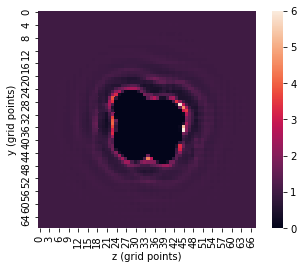

In [6]:
guv_3D.slice('x', 34).plt(vmax=6)

### VMD commands

You can also generate some VMD functions for the 3D and 2D grids which can help to visualise the RISM box and the different slices using VMD.

To plot the 3D box around the molecule, run `guv_3D.vmd_box()` and copy and paste the resulting function into the terminal running VMD or into the VMD tcl console.  Then to draw the RISM box run `draw_rism_box` also from the VMD terminal or tcl console.

In [7]:
guv_3D.vmd_box()

proc draw_rism_box {} {
set sel [atomselect top all]
draw color blue
draw line "-16.996 -17.608 -16.400" "-16.996 -17.608 17.600" style solid width 1
draw line "-16.996 16.392 -16.400" "-16.996 16.392 17.600" style solid width 1
draw line "-16.996 -17.608 -16.400" "-16.996 16.392 -16.400" style solid width 1
draw line "-16.996 -17.608 17.600" "-16.996 16.392 17.600" style solid width 1
draw line "17.004 -17.608 -16.400" "17.004 -17.608 17.600" style solid width 1
draw line "17.004 16.392 -16.400" "17.004 16.392 17.600" style solid width 1
draw line "17.004 -17.608 -16.400" "17.004 16.392 -16.400" style solid width 1
draw line "17.004 -17.608 17.600" "17.004 16.392 17.600" style solid width 1
draw line "-16.996 -17.608 -16.400" "17.004 -17.608 -16.400" style solid width 1
draw line "-16.996 -17.608 17.600" "17.004 -17.608 17.600" style solid width 1
draw line "-16.996 16.392 -16.400" "17.004 16.392 -16.400" style solid width 1
draw line "-16.996 16.392 17.600" "17.004 16.392 17.600" sty

For the 2D slices you can run `guv_2D.vmd_cmds()` to get VMD functions to rotate the molecule to the same orientation as the corresponding heat map and also to slice through the molecule at the same point as the heat map plane.  This should make it easier to make figures which combine the molecule rendered using VMD and the heat map.  The different functions are:

- `rot_view_x`, `rot_view_y`, `rot_view_z` Rotate the molecule to match the orientation of the heat map perpendicular to the $x$, $y$ or $z$ axis.
- `draw_rism_edges` Draw the edges of the 2D slice.
- `draw_rism_area` Draw a solid, coloured rectangle representing the 2D slice.
- `clipplane_above`, `clipplane_below` Clip the molecule by cutting away any parts of the molecule above or below the 2D slice.
- `clipplane_above_margin`, `clipplane_below_margin` Same as above, except includes an extra margin of 2 grid points below or above the clip plane.  This makes it easier to combine with the heat map since some parts of the molecule just below the surface can still influence the RISM values at the surface.
- `rm_clipplanes` Remove the clip plane and display the whole molecule again.

To remove all drawn lines and shapes in VMD run: `draw delete all`.

Copy these into the terminal running VMD or into the VMD tcl console and then run them by typing the function name.  Alternatively you can also save all of these commands to a file by providing a filename to `vmd_box(vmd_filename=<filename>)` or `vmd_cmds(vmd_filename=<filename>)`.  You can then load them all into VMD by running `source <filename>`.

In [8]:
# Print VMD functions for the x = 34 slice:
guv_2D = guv_3D.slice('x', 34)
guv_2D.vmd_cmds()

proc rot_view_x {} {
display resetview
rotate y by -90
rotate z by 180
}
proc draw_rism_edges {} {
set sel [atomselect top all]
draw color blue
draw line "0.004 -17.608 -16.400" "0.004 16.392 -16.400" style solid width 1
draw line "0.004 -17.608 -16.400" "0.004 -17.608 17.600" style solid width 1
draw line "0.004 16.392 17.600" "0.004 16.392 -16.400" style solid width 1
draw line "0.004 16.392 17.600" "0.004 -17.608 17.600" style solid width 1
}
proc draw_rism_area {} {
set sel [atomselect top all]
draw color blue
draw triangle "0.004 -17.608 -16.400" "0.004 16.392 -16.400" "0.004 -17.608 17.600"
draw triangle "0.004 16.392 17.600" "0.004 16.392 -16.400" "0.004 -17.608 17.600"
}
proc clipplane_above {{mol 0}} {
mol clipplane status 0 0 $mol 2
mol clipplane normal 0 0 $mol "1 0 0"
mol clipplane center 0 0 $mol "0.003601310000000524 0 0"
}
proc clipplane_below {{mol 0}} {
mol clipplane status 0 0 $mol 2
mol clipplane normal 0 0 $mol "-1 0 0"
mol clipplane center 0 0 $mol "0.0036013100000

Examples of using the VMD functions:

Visualising RISM box and surface in VMD:


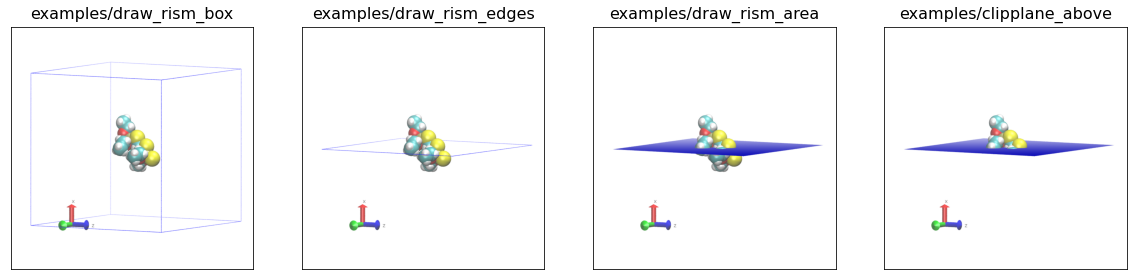


Aligning molecule in VMD with heatmap using rot_view_x/y/z:


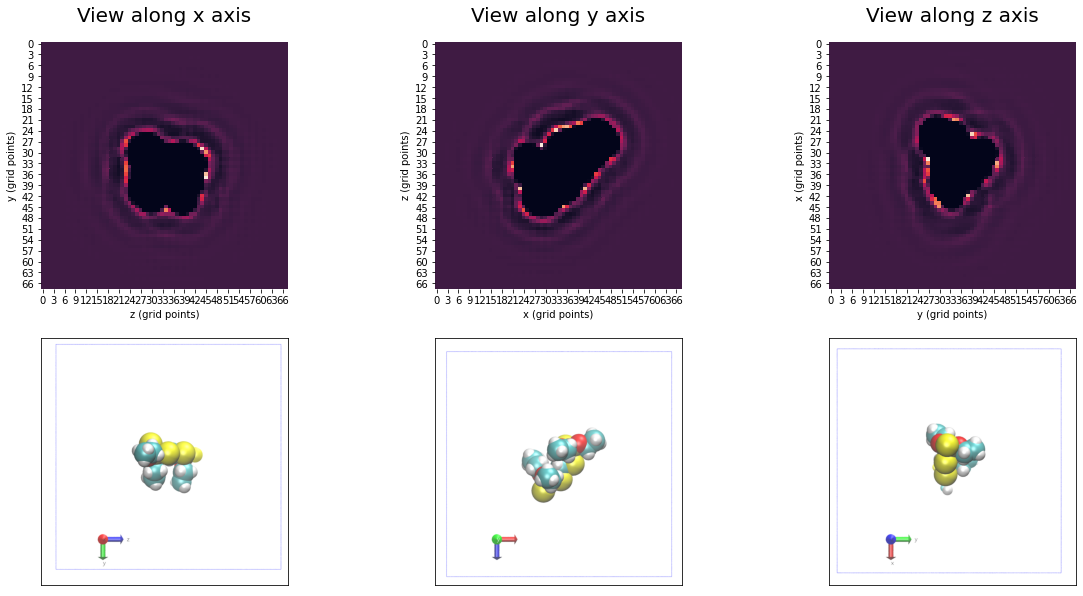

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print('Visualising RISM box and surface in VMD:')

# read images
img_files = ['examples/draw_rism_box.tga',
             'examples/draw_rism_edges.tga',
             'examples/draw_rism_area.tga',
             'examples/clipplane_above.tga']

# display images
fig, ax = plt.subplots(1,4, figsize=(20, 5)) #, wspace=0.1)
for i, img_file in enumerate(img_files):
    img = mpimg.imread(img_file)
    ax[i].imshow(img)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(img_file.split('.')[0], fontsize=16, pad=8)

plt.show()
print()

print('Aligning molecule in VMD with heatmap using rot_view_x/y/z:')

fig, ax = plt.subplots(2, 3, figsize=(20, 10), gridspec_kw={'hspace':0.2})
for ax_i, gridax in enumerate(['x', 'y', 'z']):
    ax[0,ax_i].set_title('View along '+gridax+' axis', fontsize=20, pad=20)
    guv_3D.slice(gridax, 34).plt(ax=ax[0,ax_i], cbar=None, vmax=6)
    img = mpimg.imread('examples/rot_'+gridax+'.tga')
    ax[1,ax_i].imshow(img)
    ax[1,ax_i].set_xticks([])
    ax[1,ax_i].set_yticks([])

plt.show()

### 1D profiles

You can also get 1D RISM profiles by slicing through a 2D grid to get the RISM values along a line.

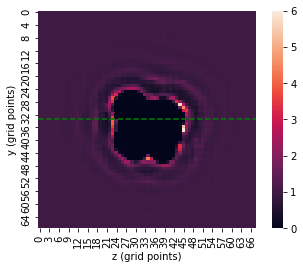

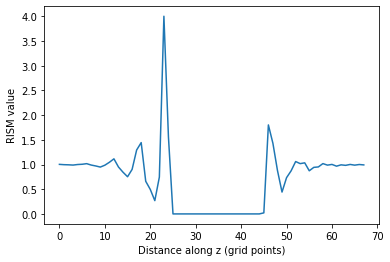

In [10]:
# Get 2D slice from 3D grid:
guv_2D_x = guv_3D.slice('x', 34)

# Plot 2D slice:
# Create axes separately and pass to guv_2D_x.plt so that
# plot can be modified later, e.g. by adding the dashed line.
ax = plt.subplot(111)
ax = guv_2D_x.plt(ax=ax, vmax=6)
ax.axhline(34, ls='--', color='green')
plt.show()

# Get profile along green dashed line (y = 34):
guv_1D = guv_2D_x.slice('y', 34)

# Plot profile:
guv_1D.plt()

The 1D grid has similar properties to the 2D and 3D grid objects and also gives a function to plot the line in VMD

In [11]:
print('Name: {}'.format(guv_1D.name))
print('Grid size: {}'.format(guv_1D.gridsize))
print('Grid step: {}'.format(guv_1D.gridstep))
print('Grid origin: {}'.format(guv_1D.origin))
print('Profile along axis: {}'.format(guv_1D.gridaxis))

Name: examples/mobley_7754849_conf0_guv.O.1.dx, x = 34, y = 34
Grid size: 68
Grid step: 0.5
Grid origin: [ 3.60131000e-03 -6.07611640e-01 -1.63996235e+01]
Profile along axis: z


In [12]:
guv_1D.vmd_line()

proc draw_rism_line {} {
set sel [atomselect top all]
draw color blue
draw line "0.004 -0.608 -16.400" "0.004 -0.608 17.600" style solid width 1



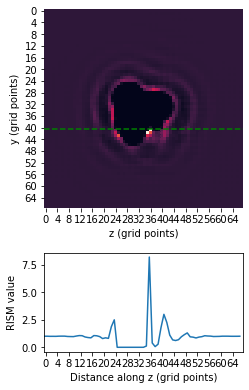

In [13]:
# Aligned 2D heatmap and 1D profile:

# Give y value of line to take profile along:
profile_y_val = 41

# Get 2D slice from 3D grid:
guv_2D_x = guv_3D.slice('x', 37)

# Set up figure and subplots:
fig, ax = plt.subplots(2, 1, figsize=(4, 6.3), 
                       sharex='col', 
                       gridspec_kw={'hspace' : 0.3, 
                                    'height_ratios' : [4, 2]})

# Plot 2D slice:
ax[0] = guv_2D_x.plt(ax=ax[0], cbar=None)

# Plot line:
ax[0].axhline(profile_y_val, ls='--', color='green')

# Reinstate tick marks along x axis (removed by sharex='col'):
ax[0].xaxis.set_tick_params(which='both', labelbottom=True)

# Add line to head map:
guv_1D = guv_2D_x.slice('y', profile_y_val)

# Plot profile along line:
ax[1] = guv_1D.plt(ax=ax[1])

# Have to realign the plots manually at the end because 
# the alignment gets disrupted:
ax[1].set_position((ax[0].get_position().bounds[0], 
                    ax[1].get_position().bounds[1], 
                    ax[0].get_position().bounds[2], 
                    ax[1].get_position().bounds[3]))

plt.show()